# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
# Definindo as faixas
bins = [-float('inf'), -10.5, float('inf')]
labels = ['Abaixo de -10.5', 'Acima de -10.5']

# Criando a nova coluna com as faixas
sinasc_raw['faixas_latitude'] = pd.cut(sinasc_raw['munResLat'], bins=bins, labels=labels)

#Criando um novo df com as colunas que serão utilizadas para as operações
sinasc_latitude = sinasc_raw[['faixas_latitude','QTDPARTCES','QTDPARTNOR','QTDGESTANT']]
sinasc_latitude.head()

,faixas_latitude,QTDPARTCES,QTDPARTNOR,QTDGESTANT
0,Abaixo de -10.5,0.0,0.0,0.0
1,Abaixo de -10.5,1.0,0.0,1.0
2,Abaixo de -10.5,1.0,1.0,2.0
3,Abaixo de -10.5,0.0,0.0,0.0
4,Abaixo de -10.5,1.0,0.0,1.0


In [6]:
# Utilizando o Groupby para realizar operações
sinasc_lat_groupby = sinasc_latitude.groupby('faixas_latitude', observed= False)

#soma
sinasc_lat_groupby.sum()

,QTDPARTCES,QTDPARTNOR,QTDGESTANT
faixas_latitude,,,
Abaixo de -10.5,7095.0,5800.0,15301.0
Acima de -10.5,6041.0,8771.0,17615.0


In [7]:
# media
sinasc_lat_groupby.mean()

,QTDPARTCES,QTDPARTNOR,QTDGESTANT
faixas_latitude,,,
Abaixo de -10.5,0.552570,0.452242,1.186032
Acima de -10.5,0.487335,0.711759,1.364024


In [8]:
# minimo  
sinasc_lat_groupby.min()

,QTDPARTCES,QTDPARTNOR,QTDGESTANT
faixas_latitude,,,
Abaixo de -10.5,0.0,0.0,0.0
Acima de -10.5,0.0,0.0,0.0


In [9]:
# maximo
sinasc_lat_groupby.max()

,QTDPARTCES,QTDPARTNOR,QTDGESTANT
faixas_latitude,,,
Abaixo de -10.5,12.0,41.0,15.0
Acima de -10.5,12.0,40.0,52.0


In [10]:
# mediana
sinasc_lat_groupby.median()

,QTDPARTCES,QTDPARTNOR,QTDGESTANT
faixas_latitude,,,
Abaixo de -10.5,0.0,0.0,1.0
Acima de -10.5,0.0,0.0,1.0


-  Podemos reparar nas analises de latitude que as regioes abaixo de -10.5 teve maior quantidade de partos cesarianas enquanto as acima tiveram mais incidencia de partos normais.

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [11]:
# Definindo as faixas
bins = [-float('inf'), 3000, float('inf')]
labels = ['Abaixo de 3000', 'Acima de 3000']

# Criando a nova coluna com as faixas
sinasc_raw['faixasAreaMunicipios'] = pd.cut(sinasc_raw['munResArea'], bins=bins, labels=labels)

#Criando um novo df com as colunas que serão utilizadas para as operações
sinasc_area = sinasc_raw[['faixasAreaMunicipios','CONSULTAS','QTDGESTANT']]
sinasc_area.head()

,faixasAreaMunicipios,CONSULTAS,QTDGESTANT
0,Acima de 3000,4,0.0
1,Acima de 3000,4,1.0
2,Acima de 3000,4,2.0
3,Acima de 3000,3,0.0
4,Acima de 3000,4,1.0


In [12]:
# Utilizando o Groupby para realizar operações
sinasc_area_groupby = sinasc_area.groupby('faixasAreaMunicipios', observed= False)

#soma
sinasc_area_groupby.sum()

,CONSULTAS,QTDGESTANT
faixasAreaMunicipios,,
Abaixo de 3000,19520,5870.0
Acima de 3000,77142,27046.0


In [13]:
# media
sinasc_area_groupby.mean()

,CONSULTAS,QTDGESTANT
faixasAreaMunicipios,,
Abaixo de 3000,3.740180,1.134300
Acima de 3000,3.537326,1.310368


In [14]:
# minima
sinasc_area_groupby.min()

,CONSULTAS,QTDGESTANT
faixasAreaMunicipios,,
Abaixo de 3000,1,0.0
Acima de 3000,1,0.0


In [15]:
# maxima
sinasc_area_groupby.max()

,CONSULTAS,QTDGESTANT
faixasAreaMunicipios,,
Abaixo de 3000,9,9.0
Acima de 3000,9,52.0


In [16]:
# mediana
sinasc_area_groupby.median()

,CONSULTAS,QTDGESTANT
faixasAreaMunicipios,,
Abaixo de 3000,4.0,1.0
Acima de 3000,4.0,1.0


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [17]:
#Determinando as faixas
faixas = pd.qcut( sinasc_raw['munResAlt'],2)

# Criando a nova coluna com as faixas
sinasc_raw['faixasAlt'] = faixas

#Criando um novo df com as colunas que serão utilizadas para as operações
sinasc_alt = sinasc_raw[['faixasAlt','APGAR1','APGAR5']]
sinasc_alt.head()

,faixasAlt,APGAR1,APGAR5
0,"(153.0, 595.0]",9.0,10.0
1,"(153.0, 595.0]",8.0,9.0
2,"(153.0, 595.0]",8.0,10.0
3,"(153.0, 595.0]",9.0,10.0
4,"(153.0, 595.0]",8.0,10.0


In [18]:
# Utilizando o Groupby para realizar operações
sinasc_alt_groupby = sinasc_alt.groupby('faixasAlt', observed= False)

#soma
sinasc_alt_groupby.sum()

,APGAR1,APGAR5
faixasAlt,,
"(84.999, 153.0]",111151.0,124967.0
"(153.0, 595.0]",107998.0,122172.0


In [19]:
# media
sinasc_alt_groupby.mean()

,APGAR1,APGAR5
faixasAlt,,
"(84.999, 153.0]",8.206054,9.228105
"(153.0, 595.0]",8.067981,9.129577


In [20]:
# mediana
sinasc_alt_groupby.median()

,APGAR1,APGAR5
faixasAlt,,
"(84.999, 153.0]",8.0,9.0
"(153.0, 595.0]",8.0,9.0


In [21]:
# maximo
sinasc_alt_groupby.max()

,APGAR1,APGAR5
faixasAlt,,
"(84.999, 153.0]",10.0,10.0
"(153.0, 595.0]",10.0,10.0


In [22]:
# minimo
sinasc_alt_groupby.min()

,APGAR1,APGAR5
faixasAlt,,
"(84.999, 153.0]",0.0,0.0
"(153.0, 595.0]",0.0,0.0


-  Podemos reparar tambem que a nota do APGAR1 e do APGAR5 e maior nos municipios com altitude menor que 153.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [23]:
# Criando um dataframe com as colunas que serao usadas
sinasc_1 = sinasc_raw[['munResNome','IDADEMAE']]
sinasc_1.head()

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30


In [24]:
# colocando a coluna munResNome como index
sinasc_2= sinasc_1.set_index('munResNome')
sinasc_2.head()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,19
Alta Floresta D'Oeste,29
Alta Floresta D'Oeste,37
Alto Alegre dos Parecis,30
Alta Floresta D'Oeste,30


In [25]:
# Criando um dicionario com as regioes imediatas
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [26]:
# Verificando a media de idade das mulheres por região imediata
sinasc_2.groupby(imediatas).mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


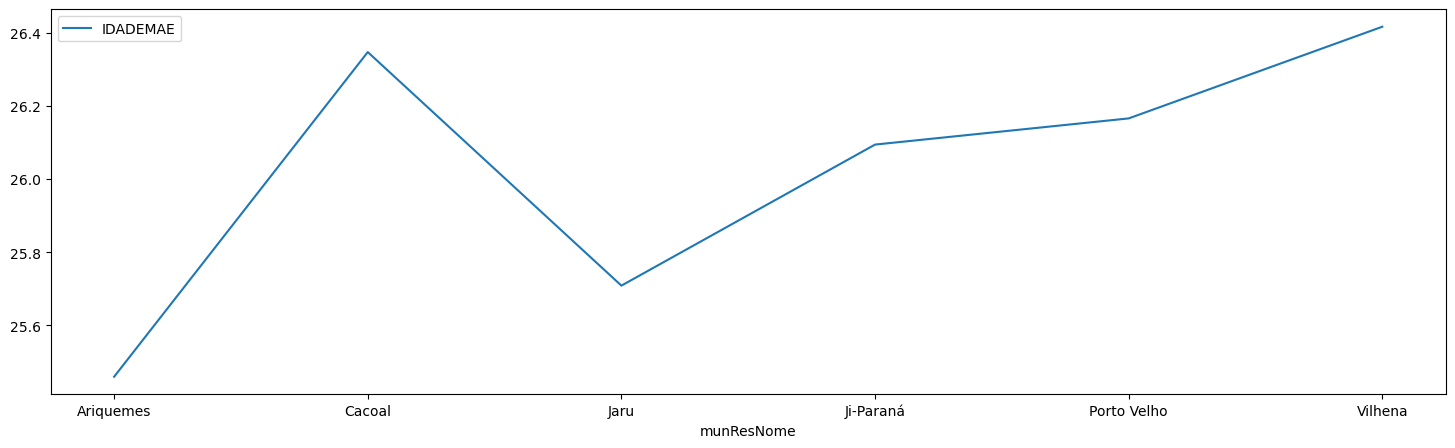

In [27]:
# Plotando em um grafico
sinasc_2.groupby(imediatas).mean().plot(figsize=[ 18,5]);

-  Verificamos que das regioes imediatas as mulheres com a maior media de idade ficam na região de Cacoal

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [53]:
# Criando um dataframe com as colunas que serao usadas
sinasc_4 = sinasc_raw[['munResNome','QTDFILMORT','QTDFILVIVO', 'APGAR1', 'APGAR5']]
sinasc_4.head()

,munResNome,QTDFILMORT,QTDFILVIVO,APGAR1,APGAR5
0,Alta Floresta D'Oeste,0.0,0.0,9.0,10.0
1,Alta Floresta D'Oeste,0.0,1.0,8.0,9.0
2,Alta Floresta D'Oeste,0.0,2.0,8.0,10.0
3,Alto Alegre dos Parecis,0.0,0.0,9.0,10.0
4,Alta Floresta D'Oeste,0.0,1.0,8.0,10.0


In [34]:
# Criando um dataframe com os dados que serão usados na analise
df = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(df['municipio'], df['regiao']))

In [51]:
# Criando um dataframe com as colunas que serao do idh
IDH = df[['municipio', 'idh']].copy()

# função que recebe o idh e compara para definir se e baixo, medio ou baixo
def classificador_IDH (idh):
    if idh >= 0.700:
        return 'IDH Alto'
    elif idh < 0.700 and idh >= 0.600:
        return 'IDH Medio'
    else: 
        return 'IDH Baixo'

# mapeando o resultado da função no nosso dataframe
IDH['categoria'] = IDH['idh'].map(classificador_IDH)

IDH

,municipio,idh,categoria
0,Alta Floresta D'Oeste,0.641,IDH Medio
1,Alto Alegre dos Parecis,0.592,IDH Baixo
2,Alto Paraíso,0.625,IDH Medio
3,Alvorada D'Oeste,0.643,IDH Medio
4,Ariquemes,0.702,IDH Alto
5,Buritis,0.616,IDH Medio
6,Cabixi,0.650,IDH Medio
7,Cacaulândia,0.646,IDH Medio
8,Cacoal,0.718,IDH Alto
9,Campo Novo de Rondônia,0.593,IDH Baixo


In [52]:
# Calculando a media do IDH baixo, alto e medio de cada região de rondonia 
IDH.groupby('categoria')['idh'].mean()

categoria
IDH Alto     0.715857
IDH Baixo    0.591333
IDH Medio    0.643250
Name: idh, dtype: float64

In [54]:
# Alterando o nome da coluna 'municipio' para 'munResNome'
IDH.rename(columns={'municipio': 'munResNome'}, inplace=True)

In [56]:
# Criando um novo df com o merge dos meus dois objetos
sinascIDH = pd.merge(sinasc_4, IDH, on='munResNome', how='inner')  # 'inner' é o padrão
sinascIDH.head()

,munResNome,QTDFILMORT,QTDFILVIVO,APGAR1,APGAR5,idh,categoria
0,Alta Floresta D'Oeste,0.0,0.0,9.0,10.0,0.641,IDH Medio
1,Alta Floresta D'Oeste,0.0,1.0,8.0,9.0,0.641,IDH Medio
2,Alta Floresta D'Oeste,0.0,2.0,8.0,10.0,0.641,IDH Medio
3,Alta Floresta D'Oeste,0.0,1.0,8.0,10.0,0.641,IDH Medio
4,Alta Floresta D'Oeste,1.0,2.0,9.0,10.0,0.641,IDH Medio


In [57]:
# Verificando se o IDH de cada região influencia na quantidade de filhos vivos e mortos 
sinascIDH.groupby('categoria').sum()

,munResNome,QTDFILMORT,QTDFILVIVO,APGAR1,APGAR5,idh
categoria,,,,,,
IDH Alto,Rolim de MouraRolim de MouraRolim de MouraRoli...,4201.0,16228.0,137271.0,154029.0,12216.420
IDH Baixo,Alto Alegre dos ParecisAlto Alegre dos Parecis...,420.0,1860.0,14607.0,16694.0,1080.899
IDH Medio,Alta Floresta D'OesteAlta Floresta D'OesteAlta...,2022.0,8738.0,67271.0,76416.0,5424.470


In [63]:
# Calculando a media das notas do APGAR1 e APGAR5 de cada região com base no IDH
sinascIDH.groupby('categoria')['APGAR1'].mean()

categoria
IDH Alto     8.172839
IDH Baixo    8.017014
IDH Medio    8.092265
Name: APGAR1, dtype: float64

In [64]:
sinascIDH.groupby('categoria')['APGAR5'].mean()

categoria
IDH Alto     9.171668
IDH Baixo    9.172527
IDH Medio    9.195668
Name: APGAR5, dtype: float64

- Podemos repara que de acordo com o IDH a porcentagem  (mortos / total) * 100 fica como 20,56% nas regiões com o IDH alto, 18,42% nas regiões com IDH baixo e 23,1% nas regiões de IDH medio ou seja as regiões com IDH medio possui a maior porcentagem de bebes mortos.

- Ja a nota do APGAR1 e do APGAR5 não sofre grandes alterações com a mudançã da nota do IDH de cada municipio.

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [40]:
# Dataframe com as colunas que serao utilizadas
IFDM = df[['municipio', 'ifdm']].copy()

# função que identifica o ifdm
def classificador_IFDM (ifdm):
    if ifdm >= 0.800:
        return 'Alto'
    elif 0.800 > ifdm >= 0.600:
        return 'Moderado'
    elif 0.600 > ifdm >= 0.400:
        return 'Regular'
    else: 
        return 'Baixo'

# mapeando o retorno da função no dataframe
IFDM['categoria'] = IFDM['ifdm'].map(classificador_IFDM)
IFDM

,municipio,ifdm,categoria
0,Alta Floresta D'Oeste,0.6337,Moderado
1,Alto Alegre dos Parecis,0.5046,Regular
2,Alto Paraíso,0.5735,Regular
3,Alvorada D'Oeste,0.5919,Regular
4,Ariquemes,0.7746,Moderado
5,Buritis,0.6199,Moderado
6,Cabixi,0.5887,Regular
7,Cacaulândia,0.5721,Regular
8,Cacoal,0.7111,Moderado
9,Campo Novo de Rondônia,0.5272,Regular


In [58]:
# Calculando a media do IFDM baixo, alto e medio de cada região de rondonia 
IFDM.groupby('categoria')['ifdm'].mean()

categoria
Moderado    0.659919
Regular     0.556362
Name: ifdm, dtype: float64

In [59]:
# Alterando o nome da coluna 'municipio' para 'munResNome'
IFDM.rename(columns={'municipio': 'munResNome'}, inplace=True)

In [68]:
# Criando um dataframe com as colunas que serao usadas
sinasc_5 = sinasc_raw[['munResNome','QTDGESTANT','CONSULTAS']]
sinasc_5.head()

,munResNome,QTDGESTANT,CONSULTAS
0,Alta Floresta D'Oeste,0.0,4
1,Alta Floresta D'Oeste,1.0,4
2,Alta Floresta D'Oeste,2.0,4
3,Alto Alegre dos Parecis,0.0,3
4,Alta Floresta D'Oeste,1.0,4


In [69]:
# Criando um novo df com o merge dos meus dois objetos
sinascIFDM = pd.merge(sinasc_5, IFDM, on='munResNome', how='inner')  # 'inner' é o padrão
sinascIFDM.head()

,munResNome,QTDGESTANT,CONSULTAS,ifdm,categoria
0,Alta Floresta D'Oeste,0.0,4,0.6337,Moderado
1,Alta Floresta D'Oeste,1.0,4,0.6337,Moderado
2,Alta Floresta D'Oeste,2.0,4,0.6337,Moderado
3,Alta Floresta D'Oeste,1.0,4,0.6337,Moderado
4,Alta Floresta D'Oeste,3.0,4,0.6337,Moderado


In [70]:
# Verificando se o IDH de cada região influencia na quantidade de filhos vivos e mortos 
sinascIFDM.groupby('categoria').sum()

,munResNome,QTDGESTANT,CONSULTAS,ifdm
categoria,,,,
Moderado,Alta Floresta D'OesteAlta Floresta D'OesteAlta...,26147.0,78453,15483.9424
Regular,Alto Alegre dos ParecisAlto Alegre dos Parecis...,6769.0,18209,2816.7098


-  Comparando a Quantidade de Gestantes com a Quantidade de Consultas (consultas / gestantes) reparamos que as regioes que tem uma nota maior do IFDM tem uma maior quantidade de consultas por gestante, cerca de 10,33% a mais nas regiões Moderadas que nas regiões regulares.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [48]:
# colunas usadas
PIB = df[['municipio', 'pib']].copy()

# funçao que verifica o Pib 
def classificador_PIB (pib):
    if pib >= 1164877:
        return 'Acima de 1 bilhão'
    elif   pib >= 500000:
        return 'Acima de 500 milhões'
    elif  pib >= 300000:
        return 'Acima de 300 milhões'
    elif  pib >= 200000:
        return 'Acima de 200 milhões'
    elif  pib >= 100000:
        return 'Acima de 100 milhões'
    else: 
        return 'Até 100 milhões'

# criando uma coluna com a categoria do pib
PIB['categoria'] = PIB['pib'].map(classificador_PIB)
PIB

,municipio,pib,categoria
0,Alta Floresta D'Oeste,496000,Acima de 300 milhões
1,Alto Alegre dos Parecis,213410,Acima de 200 milhões
2,Alto Paraíso,358000,Acima de 300 milhões
3,Alvorada D'Oeste,204098,Acima de 200 milhões
4,Ariquemes,2579830,Acima de 1 bilhão
5,Buritis,726000,Acima de 500 milhões
6,Cabixi,113031,Acima de 100 milhões
7,Cacaulândia,116635,Acima de 100 milhões
8,Cacoal,2261644,Acima de 1 bilhão
9,Campo Novo de Rondônia,208821,Acima de 200 milhões


In [71]:
# Calculando a media do Pib  
PIB.groupby('categoria')['pib'].mean()

categoria
Acima de 1 bilhão       4.164736e+06
Acima de 100 milhões    1.478447e+05
Acima de 200 milhões    2.113702e+05
Acima de 300 milhões    3.878571e+05
Acima de 500 milhões    6.567778e+05
Até 100 milhões         7.294688e+04
Name: pib, dtype: float64

In [72]:
# Alterando o nome da coluna 'municipio' para 'munResNome'
PIB.rename(columns={'municipio': 'munResNome'}, inplace=True)

In [73]:
# Criando um dataframe com as colunas que serao usadas
sinasc_6 = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI', 'QTDPARTNOR', 'QTDPARTCES']]
sinasc_6.head()

,munResNome,IDADEMAE,IDADEPAI,QTDPARTNOR,QTDPARTCES
0,Alta Floresta D'Oeste,19,26.0,0.0,0.0
1,Alta Floresta D'Oeste,29,24.0,0.0,1.0
2,Alta Floresta D'Oeste,37,32.0,1.0,1.0
3,Alto Alegre dos Parecis,30,24.0,0.0,0.0
4,Alta Floresta D'Oeste,30,27.0,0.0,1.0


In [74]:
# Criando um novo df com o merge dos meus dois Dataframes
sinascPIB = pd.merge(sinasc_6, PIB, on='munResNome', how='inner')  # 'inner' é o padrão
sinascPIB.head()

,munResNome,IDADEMAE,IDADEPAI,QTDPARTNOR,QTDPARTCES,pib,categoria
0,Alta Floresta D'Oeste,19,26.0,0.0,0.0,496000,Acima de 300 milhões
1,Alta Floresta D'Oeste,29,24.0,0.0,1.0,496000,Acima de 300 milhões
2,Alta Floresta D'Oeste,37,32.0,1.0,1.0,496000,Acima de 300 milhões
3,Alta Floresta D'Oeste,30,27.0,0.0,1.0,496000,Acima de 300 milhões
4,Alta Floresta D'Oeste,33,40.0,1.0,1.0,496000,Acima de 300 milhões


In [75]:
# Retirando a coluna munResNome para facilitar a analise
sinascPIB = sinascPIB.drop('munResNome', axis = 1)

In [76]:
# Calculando a idade maxima dos pais por PIB
sinascPIB.groupby('categoria').max()

,IDADEMAE,IDADEPAI,QTDPARTNOR,QTDPARTCES,pib
categoria,,,,,
Acima de 1 bilhão,47,70.0,40.0,12.0,17912070
Acima de 100 milhões,52,73.0,14.0,4.0,190331
Acima de 200 milhões,44,55.0,41.0,3.0,219152
Acima de 300 milhões,53,64.0,8.0,4.0,496000
Acima de 500 milhões,53,86.0,40.0,5.0,893000
Até 100 milhões,41,67.0,6.0,3.0,92346


In [77]:
# Calculando a idade minima dos pais por PIB
sinascPIB.groupby('categoria').min()

,IDADEMAE,IDADEPAI,QTDPARTNOR,QTDPARTCES,pib
categoria,,,,,
Acima de 1 bilhão,12,15.0,0.0,0.0,1164877
Acima de 100 milhões,12,17.0,0.0,0.0,105208
Acima de 200 milhões,13,16.0,0.0,0.0,204098
Acima de 300 milhões,11,16.0,0.0,0.0,335000
Acima de 500 milhões,13,16.0,0.0,0.0,507000
Até 100 milhões,14,17.0,0.0,0.0,52908


In [78]:
# Calculando a quantidade de partos normais e cesarianas por PIB
sinascPIB.groupby('categoria').count()

,IDADEMAE,IDADEPAI,QTDPARTNOR,QTDPARTCES,pib
categoria,,,,,
Acima de 1 bilhão,17736,4650,16460,16440,17736
Acima de 100 milhões,1952,666,1914,1913,1952
Acima de 200 milhões,724,295,644,669,724
Acima de 300 milhões,1880,638,1859,1857,1880
Acima de 500 milhões,4304,1087,3844,3931,4304
Até 100 milhões,431,270,427,426,431


In [79]:
# Calculando a quantidade mediana por PIB
sinascPIB.groupby('categoria').median()

,IDADEMAE,IDADEPAI,QTDPARTNOR,QTDPARTCES,pib
categoria,,,,,
Acima de 1 bilhão,26.0,30.0,0.0,0.0,3783972.0
Acima de 100 milhões,25.0,30.0,0.0,0.0,163955.0
Acima de 200 milhões,25.0,30.0,0.0,0.0,208821.0
Acima de 300 milhões,25.0,29.0,0.0,0.0,360000.0
Acima de 500 milhões,25.0,31.0,0.0,0.0,633000.0
Até 100 milhões,26.0,30.0,0.0,0.0,76756.0


- Por essa analise não vemos muita mudança relevante em agrupar de acordo com o PIB, mas observamos que os municipios com o PIB acima de 300 milhoes e abaixo de 500 tem a maior diferença de idades das mulheres ja os homens essa diferença aparece nos municipios com o maior PIB com a idade dos Pais variando de 15 a 70 anos.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

-  Podemos reparar nas analises de latitude que as regioes abaixo de -10.5 teve maior quantidade de partos cesarianas enquanto as acima tiveram mais incidencia de partos normais.

-  Verificamos que das regioes imediatas as mulheres com a maior media de idade ficam na região de Cacoal

- Podemos repara que de acordo com o IDH a porcentagem  (mortos / total) * 100 fica como 20,56% nas regiões com o IDH alto, 18,42% nas regiões com IDH baixo e 23,1% nas regiões de IDH medio ou seja as regiões com IDH medio possui a maior porcentagem de bebes mortos.

- Ja a nota do APGAR1 e do APGAR5 não sofre grandes alterações com a mudançã da nota do IDH de cada municipio.

-  Comparando a Quantidade de Gestantes com a Quantidade de Consultas (consultas / gestantes) reparamos que as regioes que tem uma nota maior do IFDM tem uma maior quantidade de consultas por gestante, cerca de 10,33% a mais nas regiões Moderadas que nas regiões regulares.

- Por essa analise não vemos muita mudança relevante em agrupar de acordo com o PIB, mas observamos que os municipios com o PIB acima de 300 milhoes e abaixo de 500 tem a maior diferença de idades das mulheres ja os homens essa diferença aparece nos municipios com o maior PIB com a idade dos Pais variando de 15 a 70 anos.